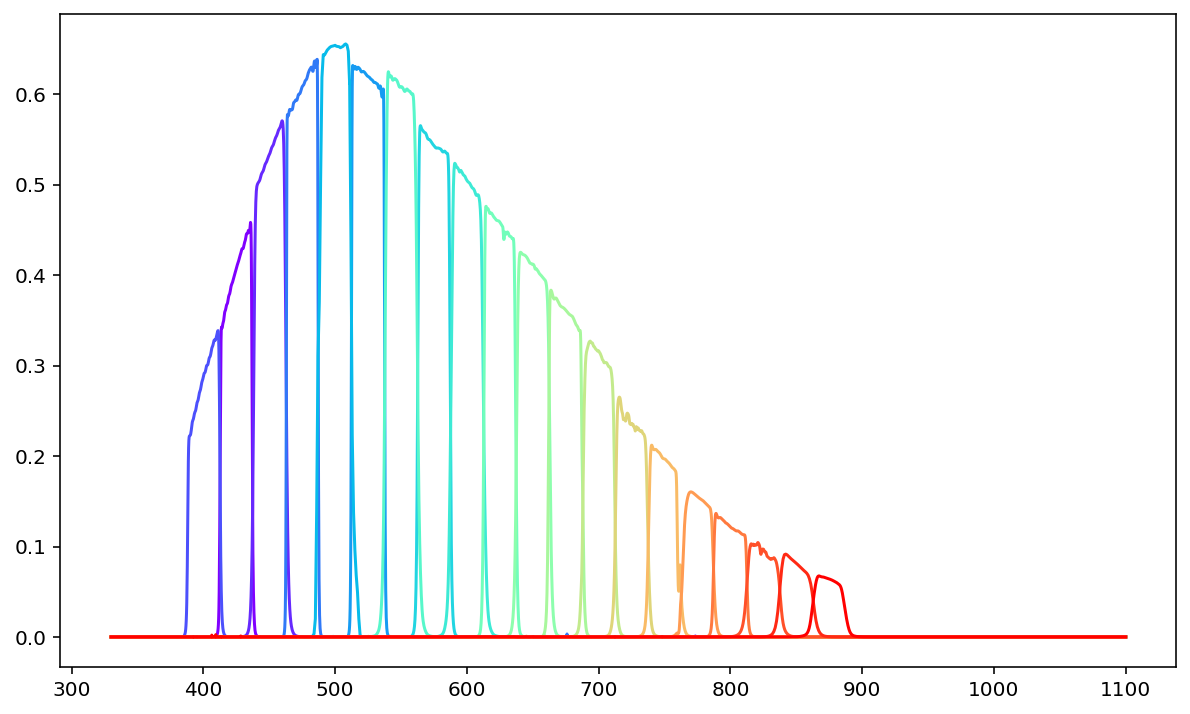

In [6]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
from matplotlib import pyplot as plt
from astropy.table import Table
from pathlib import Path
import numpy as np

CWD = Path.cwd()
WD = CWD.parent

FILTERDIR = WD / '7DT_filters_v2' 
filtpaths = list(FILTERDIR.glob('*.csv'))

colors = plt.cm.rainbow(np.linspace(0, 1, len(filtpaths)))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
for i, filtpath in enumerate(filtpaths):
    filt = Table.read(filtpath)
    ax.plot(filt['wavelength'], filt['transmission'], c=colors[i])
fig.savefig('test.png')